In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from keras import backend as BK


In [3]:
#importing the dataset
from keras.datasets import mnist

## Load train and test data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print("Dimension of X_train", X_train.shape)
print("Dimension of y_train set", y_train.shape)
print("Dimension of X_test", X_test.shape)
print("Dimension of y_test set", y_test.shape)



Dimension of X_train (60000, 28, 28)
Dimension of y_train set (60000,)
Dimension of X_test (10000, 28, 28)
Dimension of y_test set (10000,)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# Normalize
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [8]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [9]:
batchsize = 128
Num_of_Classes = 10
epochs = 10
input_shape = (28, 28, 1)

In [10]:
# Build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(Num_of_Classes, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the model

In [11]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Train the model only once
hist = model.fit(
    X_train, y_train,
    batch_size=batchsize,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7368 - loss: 0.7925 - val_accuracy: 0.9784 - val_loss: 0.0713
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9652 - loss: 0.1262 - val_accuracy: 0.9866 - val_loss: 0.0445
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.0847 - val_accuracy: 0.9884 - val_loss: 0.0366
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0656 - val_accuracy: 0.9885 - val_loss: 0.0382
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0547 - val_accuracy: 0.9904 - val_loss: 0.0317
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9870 - loss: 0.0486 - val_accuracy: 0.9904 - val_loss: 0.0320
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0386 - val_accuracy: 0.9923 - val_loss: 0.0281
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0367 - val_accuracy: 

In [12]:
# Evaluate
score = model.evaluate(X_test, y_test, verbose=1)
print("test loss:", score[0])
print("test acc:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0359
test loss: 0.029272811487317085
test acc: 0.9912999868392944


In [13]:
# Save model
model.save("mnist.h5")

In [16]:
import random

def test_random_digit():
    idx = random.randint(0, len(X_test) - 1)

    img = X_test[idx]
    true_label = np.argmax(y_test[idx])

    # Show image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Actual Label: {true_label}")
    plt.axis('off')
    plt.show()

    # Predict
    pred = np.argmax(model.predict(img.reshape(1,28,28,1))[0])
    print("Predicted Label:", pred)


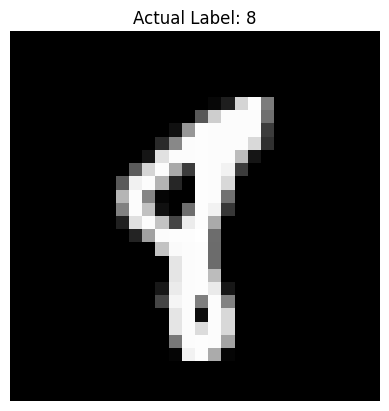

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Label: 8


In [24]:
test_random_digit()